# Data Description


You can get data from Kaggle : https://www.kaggle.com/competitions/titanic/data

* Data Dictionary

| Feature | Definition | Key |
|:---|:---|:---|
| PassengerId | Unique ID of the passenger |  |
| Survived | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | Name of the passenger |  |
| Sex | Sex |  |
| Age | Age in years |  |
| SibSp | # of siblings / spouses aboard the Titanic |  |
| Parch | # of parents / children aboard the Titanic |  |
| Ticket | Ticket number |  |
| Fare | Passenger fare |  |
| Cabin | Cabin number |  |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


* Data Dictionary

    * `pclass`: A proxy for socio-economic status (SES)
        - 1st = Upper
        - 2nd = Middle
        - 3rd = Lower

    * `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    * `sibsp`: The dataset defines family relations in this way...
        + Sibling = brother, sister, stepbrother, stepsister
        + Spouse = husband, wife (mistresses and fiancés were ignored)

    * `parch`: The dataset defines family relations in this way...
        + Parent = mother, father
        + Child = daughter, son, stepdaughter, stepson
        + Some children travelled only with a nanny, therefore parch=0 for them.




# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring the Data

In [ ]:
df = pd.read_csv('/content/titanic_data.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Unuseful Features : `PassengerId, Name and Ticket` >> To be dropped
* Categorical Features: `Sex, Pclass, SibSp, Parch and Embarked `
* Numerical Features : `Age and Fare`
* Target : `Survived`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


# Duplicate Values

In [ ]:
df.duplicated().sum()

np.int64(0)

>If there are any duplicates, we will drop them:

         df.drop_duplicates(inplace=True)

# Missing Values

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
round(df.isna().mean()*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


* Missing Values can be dropped or imputed.
* If Missing Values are less than 5% of the total data, we can drop ***Rows***.
* If Missing Values are more than 40% of the total data, we can drop ***Column***.
* Otherwise, we can impute them
        
        ( Not a rule of thumb, but a good practice)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [ ]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Drop Columns

Drop Unnecessary columns

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Rename Columns

you can use rename method
```
df.rename(columns={'Survived': 'survived', 'Pclass': 'pclass', 'SibSp': 'brothers', 'Parch': 'parch'}, inplace=True)
```



In [ ]:
df.columns = df.columns.str.lower()

# Create New Feature

In [ ]:
df['family_size'] = df['sibsp'] + df['parch']

# Univariate Analysis

In [ ]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size
819,0,3,male,10.0,3,2,27.9,S,5


In [ ]:
df['survived'].value_counts()

,count
survived,
0,549
1,342


In [ ]:
# df.survived.value_counts(normalize=True)
round(df['survived'].value_counts() / df.shape[0] * 100, 2)

,count
survived,
0,61.62
1,38.38


        Insight:
        > Survived Rate: 38.38%

In [ ]:
df['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


In [ ]:
round(df['pclass'].value_counts(normalize=True)*100, 2)

,proportion
pclass,
3,55.11
1,24.24
2,20.65


        Insight:
        > More than 55% of the passengers were from 3rd class

In [ ]:
df['sex'].value_counts(normalize=True)

,proportion
sex,
male,0.647587
female,0.352413


        Insight:
        > More than 64% of the passengers were male

In [ ]:
df.sibsp.value_counts(normalize=True)

,proportion
sibsp,
0,0.682379
1,0.234568
2,0.031425
4,0.020202
3,0.017957
8,0.007856
5,0.005612


        Insight:
        > More than 68% of the passengers had no siblings or spouse

In [ ]:
def explore_categorical(df, col):
    print(f'### {col} ###')
    print(df[col].value_counts(normalize=True))
    sns.countplot(x=col, data=df);
    plt.show()

### pclass ###
pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


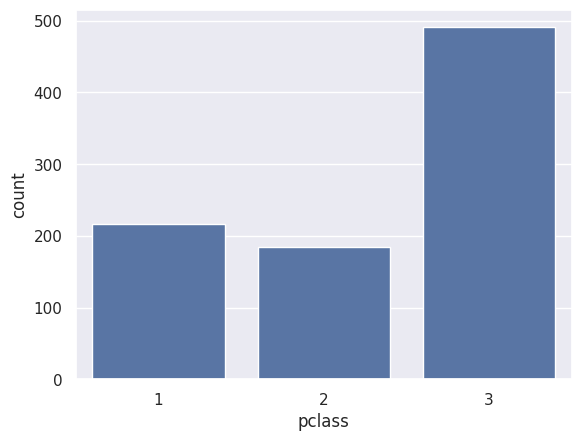

### sibsp ###
sibsp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64


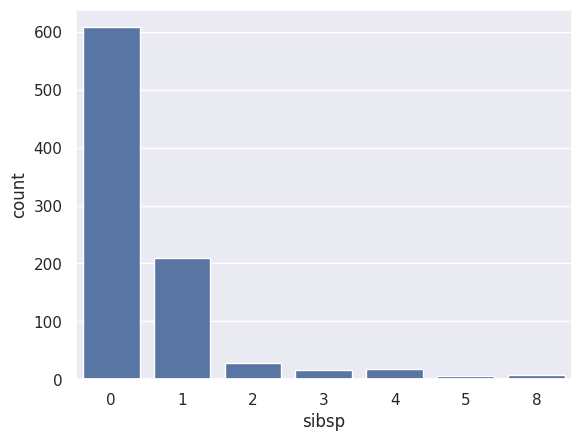

### parch ###
parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: proportion, dtype: float64


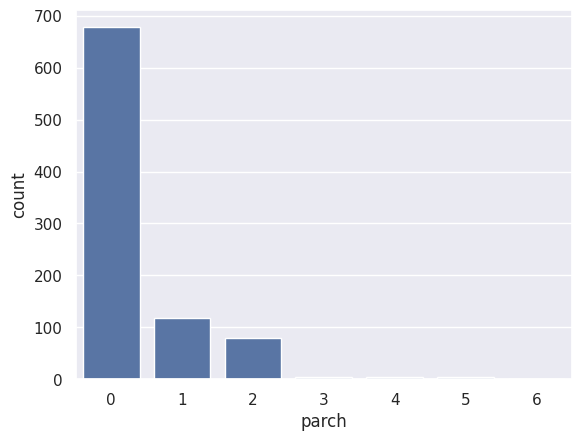

### embarked ###
embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64


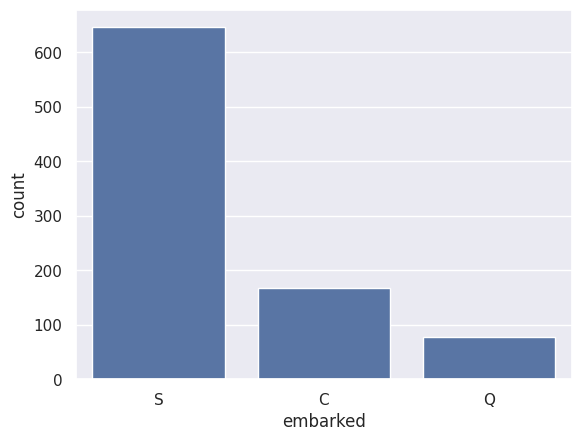

### sex ###
sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


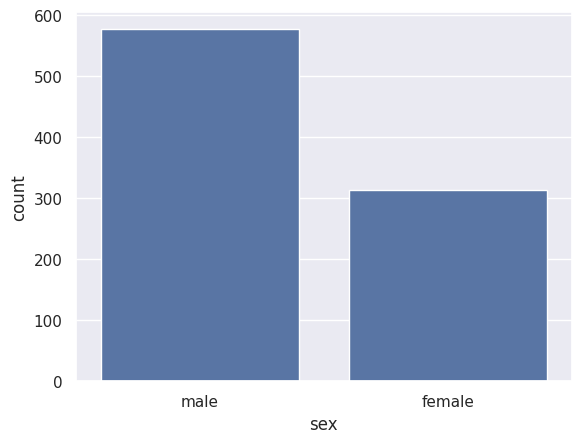

### family_size ###
family_size
0     0.602694
1     0.180696
2     0.114478
3     0.032548
5     0.024691
4     0.016835
6     0.013468
10    0.007856
7     0.006734
Name: proportion, dtype: float64


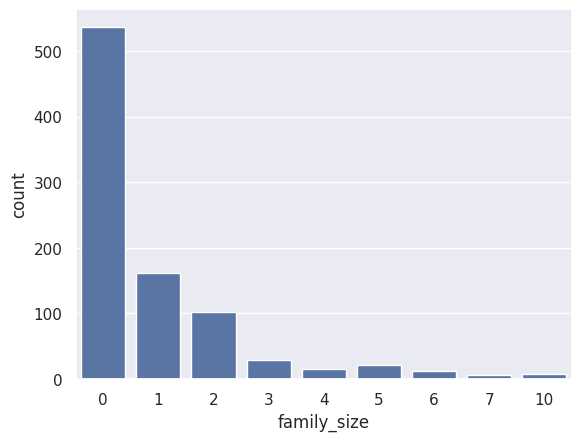

In [ ]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex', 'family_size']:
    explore_categorical(df, col)

In [ ]:
def explore_continuous(df, col):
    print(f'### {col} ###')
    print(df[col].describe())
    sns.histplot(x=col, data=df);
    plt.show()

### age ###
count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64


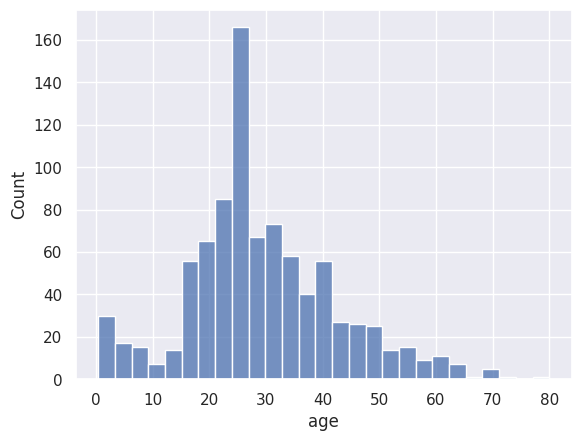

### fare ###
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


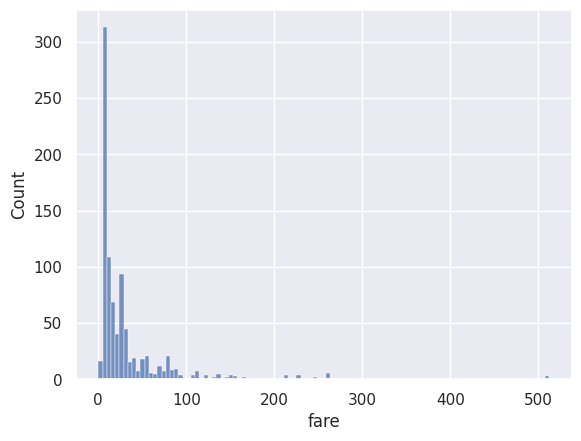

In [ ]:
for col in ['age', 'fare']:
    explore_continuous(df, col)

# Bivariate Analysis

In [ ]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size
655,0,2,male,24.0,2,0,73.5,S,2


In [ ]:
df.groupby('pclass')['survived'].mean() * 100

,survived
pclass,
1,62.962963
2,47.282609
3,24.236253


        Insight:
        > The higher the class, the higher the survival rate

In [ ]:
df.groupby('sex')['survived'].mean() * 100

,survived
sex,
female,74.203822
male,18.890815


        Insight:
        > The majority of survivors were female

In [ ]:
# Survival rate for each group
def survival_rate(df, col):
    print(df.groupby(col).survived.mean()*100)
    sns.barplot(x=col, y='survived', data=df, ci=None);
    #plot horizontal line for overall survival rate
    plt.axhline(df.survived.mean(), color='black', linestyle='--')
    plt.show()

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


/tmp/ipython-input-1726051696.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


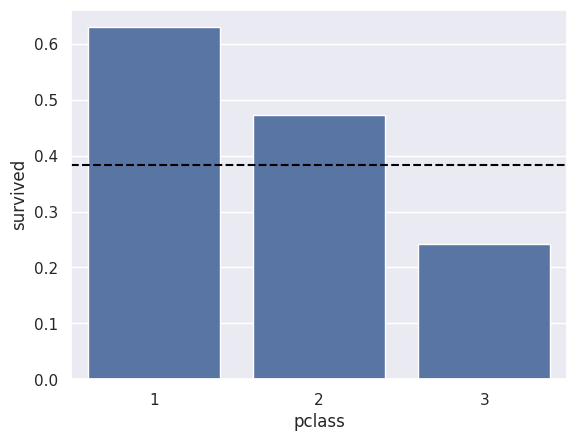

sibsp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: survived, dtype: float64


/tmp/ipython-input-1726051696.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


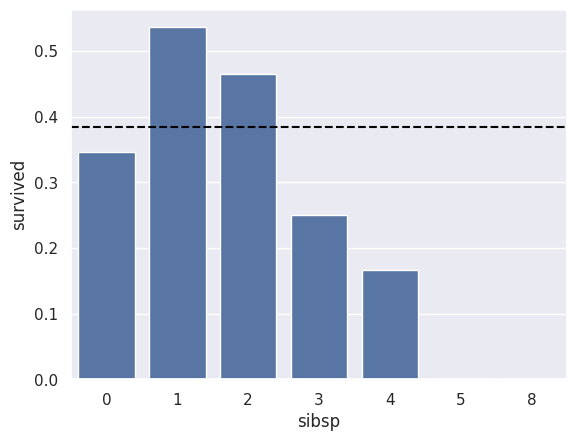

parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: survived, dtype: float64


/tmp/ipython-input-1726051696.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


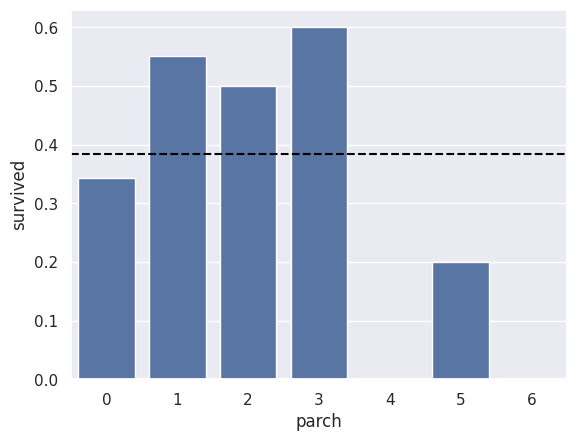

embarked
C    55.357143
Q    38.961039
S    33.900929
Name: survived, dtype: float64


/tmp/ipython-input-1726051696.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


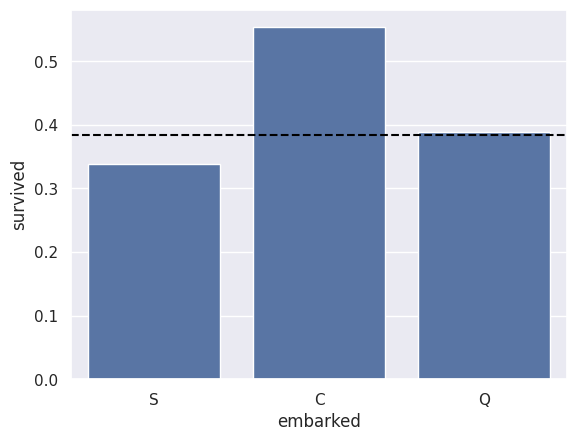

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


/tmp/ipython-input-1726051696.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


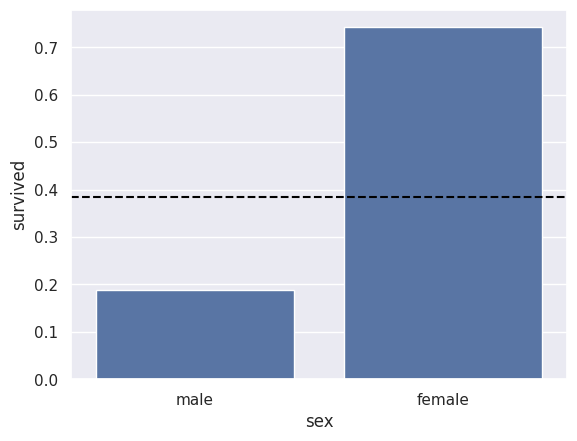

family_size
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: survived, dtype: float64


/tmp/ipython-input-1726051696.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


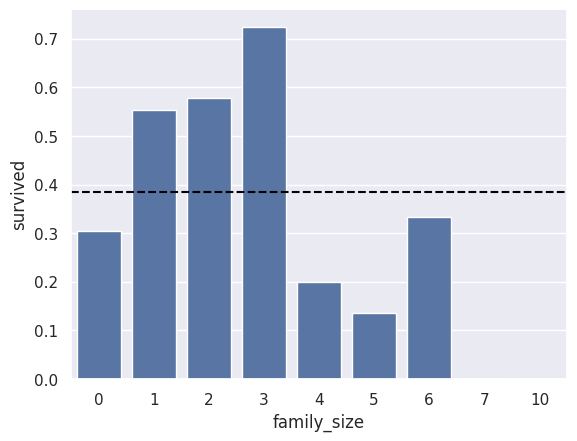

In [ ]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex', 'family_size']:
    survival_rate(df, col)

* How many passengers were alone? What is their Survival Rate?

In [ ]:
len(df[df['family_size']==0])

537

* What are top 3 categories from "family_size" have highest survival Rate?

In [ ]:
df.groupby('family_size')['survived'].mean().sort_values(ascending=False).head(3)

,survived
family_size,
3,0.724138
2,0.578431
1,0.552795


<Axes: xlabel='age', ylabel='Count'>

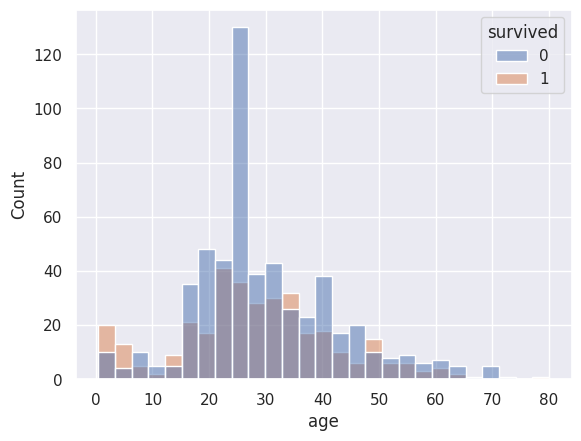

In [ ]:
sns.histplot(x='age', data=df, hue='survived')

<Axes: xlabel='fare', ylabel='Count'>

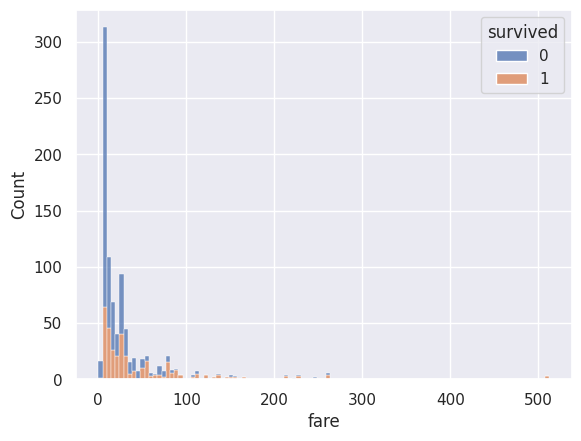

In [ ]:
sns.histplot(x='fare', data=df, hue='survived', multiple='stack')

In [ ]:
df_survived = df[df.survived == 1]
df_died = df[df.survived == 0]

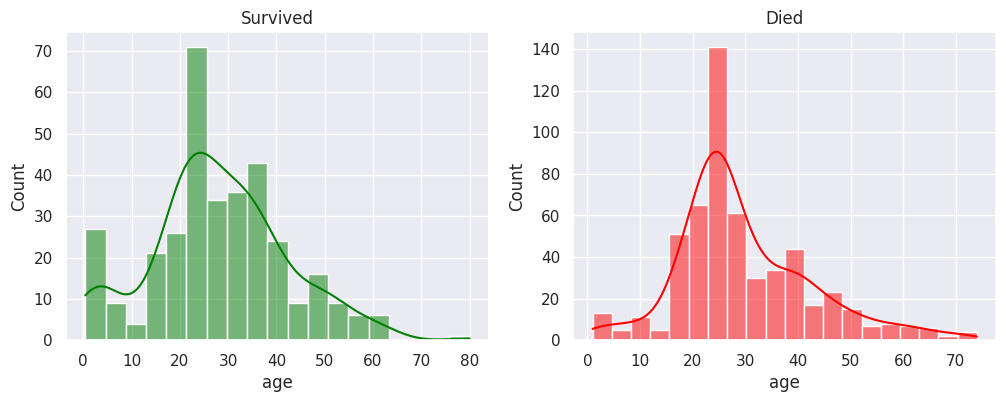

In [ ]:
# Subplots for age distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='age', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='age', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

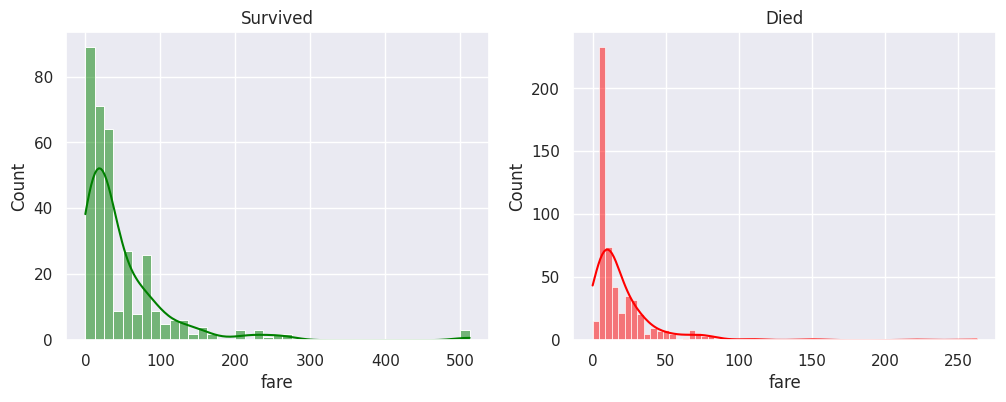

In [ ]:
# Subplots for fare distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='fare', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='fare', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

<Axes: xlabel='age'>

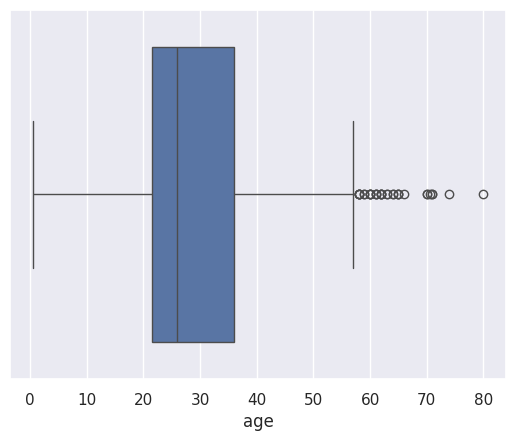

In [ ]:
sns.boxplot(x='age', data=df)

<Axes: xlabel='fare'>

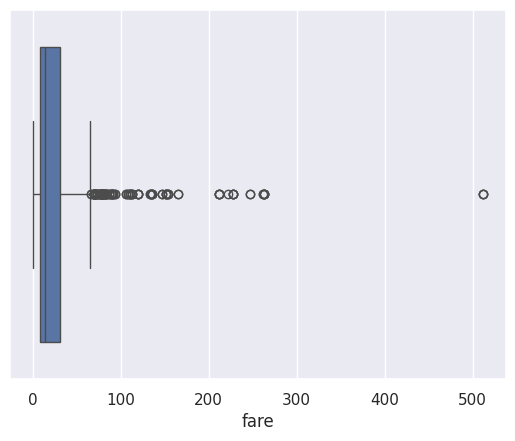

In [ ]:
sns.boxplot(x='fare', data=df)

            Many outliers in the fare
* We can use the IQR method to remove them.
* We can also choose a limit according to the distribution of the data.


# Outliers Detection

In [ ]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df = remove_outliers(df, 'fare')

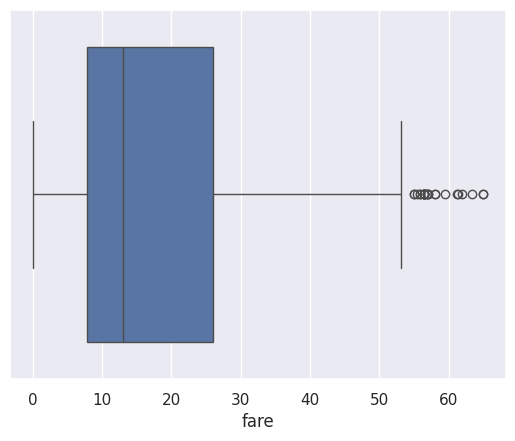

In [ ]:
sns.boxplot(x='fare', data=df);

* Try differnet age groups

In [ ]:
# Split Age into groups
df['age_group'] = pd.cut(df['age'], bins=[0, 22, 27, 37, 82], labels=['child', 'young', 'adult', 'senior'])

# Split Fare into groups
df['fare_group'] = pd.cut(df['fare'], bins=[-0.99, 8, 15, 35, 265], labels=['low', 'medium', 'high', 'very high'])

age_group
child     43.495935
young     23.626374
adult     36.666667
senior    28.143713
Name: survived, dtype: float64


/tmp/ipython-input-1726051696.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col).survived.mean()*100)
/tmp/ipython-input-1726051696.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


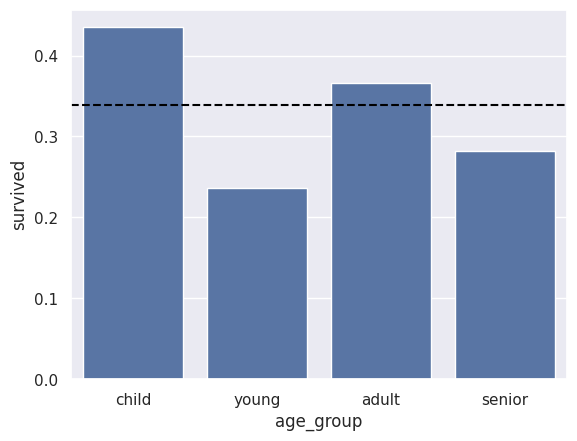

/tmp/ipython-input-1726051696.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col).survived.mean()*100)
/tmp/ipython-input-1726051696.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


fare_group
low          21.576763
medium       28.571429
high         44.680851
very high    53.658537
Name: survived, dtype: float64


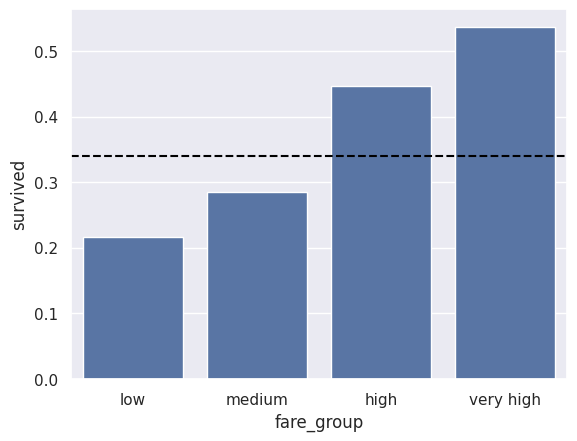

In [ ]:
for col in ['age_group', 'fare_group']:
    survival_rate(df, col)

# Multivariate Analysis

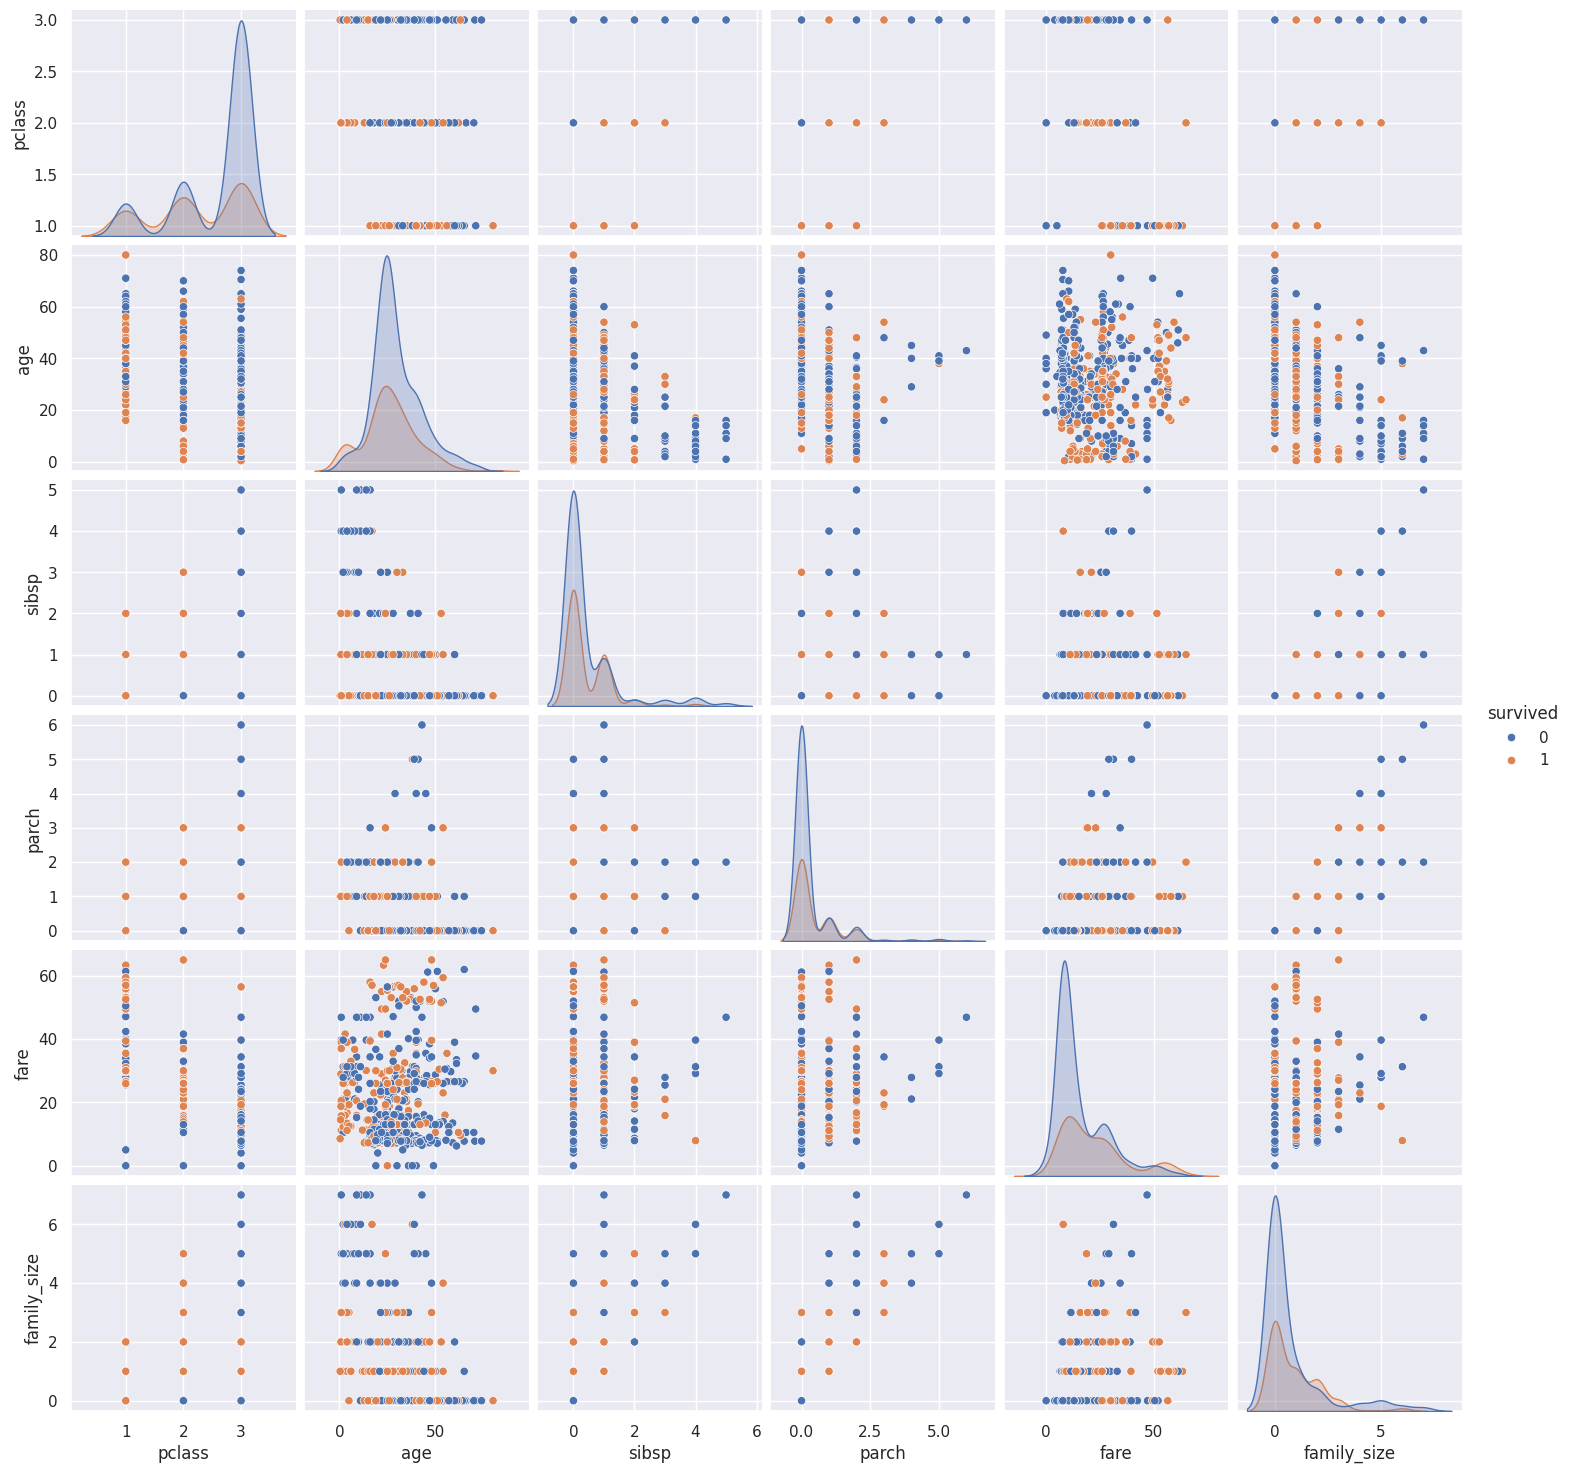

In [ ]:
sns.pairplot(df, hue='survived')

In [ ]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].corr()

,survived,pclass,age,sibsp,parch,fare,family_size
survived,1.000000,-0.238532,-0.119090,-0.003156,0.098575,0.234422,0.052674
pclass,-0.238532,1.000000,-0.429453,0.113943,0.083451,-0.589776,0.118653
age,-0.119090,-0.429453,1.000000,-0.334462,-0.199575,0.129365,-0.323113
sibsp,-0.003156,0.113943,-0.334462,1.000000,0.410182,0.370388,0.862608
parch,0.098575,0.083451,-0.199575,0.410182,1.000000,0.336844,0.815184
fare,0.234422,-0.589776,0.129365,0.370388,0.336844,1.000000,0.422070
family_size,0.052674,0.118653,-0.323113,0.862608,0.815184,0.422070,1.000000


In [ ]:
df[num_cols].corr()['survived']

,survived
survived,1.000000
pclass,-0.238532
age,-0.119090
sibsp,-0.003156
parch,0.098575
fare,0.234422
family_size,0.052674


<Axes: >

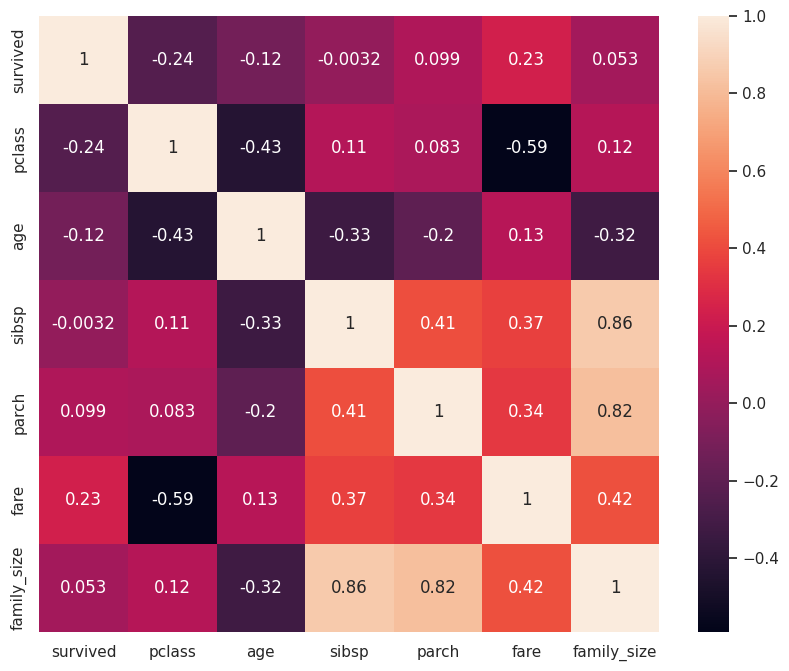

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True)

/tmp/ipython-input-1058057586.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);


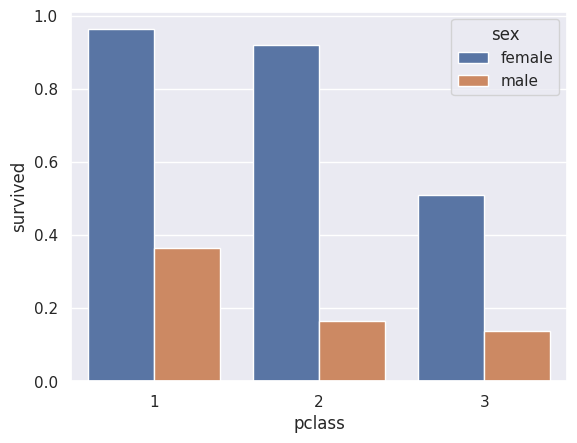

In [ ]:
sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);

/tmp/ipython-input-3729839610.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);


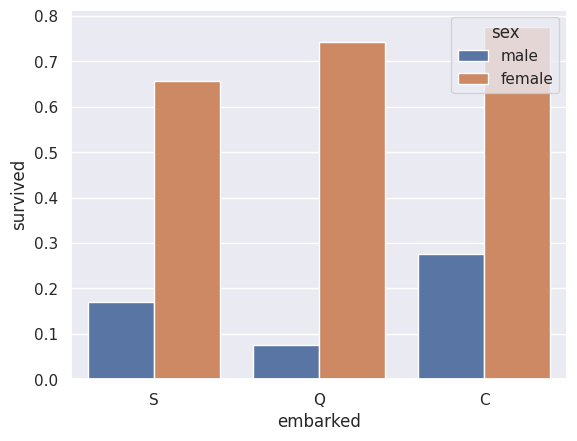

In [ ]:
sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);

/tmp/ipython-input-2556949731.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='survived', hue= 'sex', data=df, ci=None);


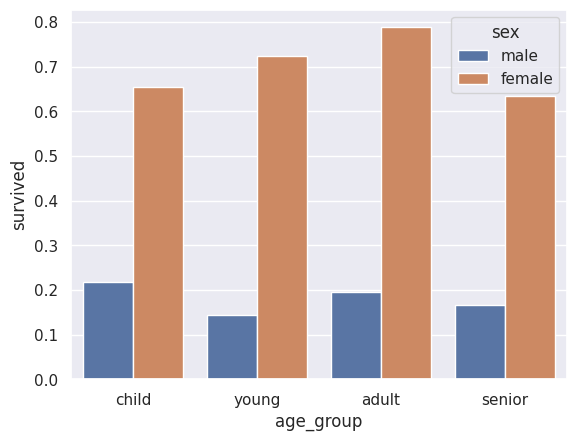

In [ ]:
sns.barplot(x='age_group', y='survived', hue= 'sex', data=df, ci=None);

# Conclusion

/tmp/ipython-input-41135376.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipython-input-41135376.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipython-input-41135376.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipython-input-41135376.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/ipython-input-41135376.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
/tmp/

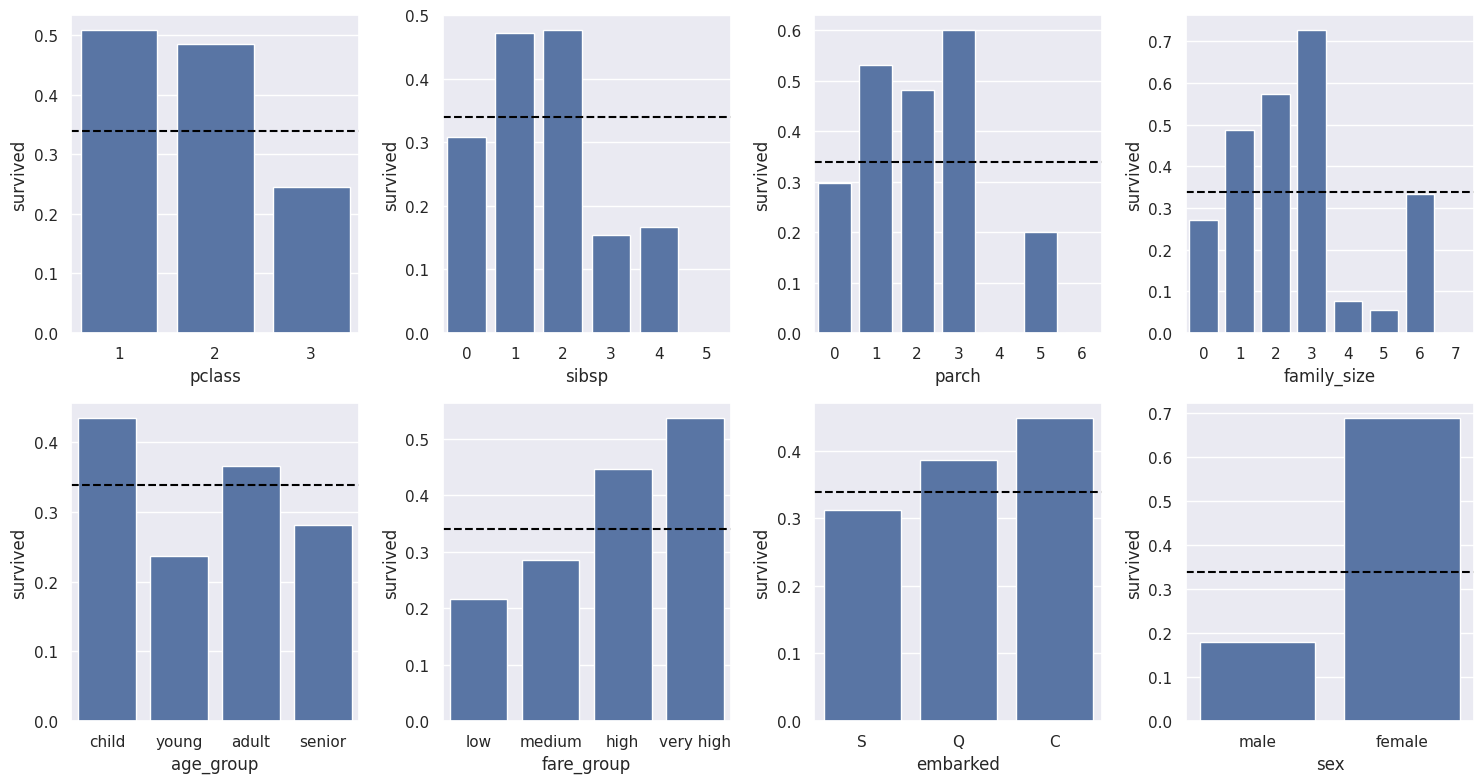

In [ ]:
# 8 Subplots
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i, col in enumerate(['pclass', 'sibsp', 'parch', 'family_size', 'age_group', 'fare_group', 'embarked', 'sex']):
    sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
    ax[i//4, i%4].axhline(df.survived.mean(), color='black', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
female_df = df[df.sex == 'female']
male_df = df[df.sex == 'male']

* Which age groups have the lowest and highest survival rate for both females and males?

In [ ]:
pd.DataFrame(df.groupby(['sex', 'age_group']).survived.mean())

/tmp/ipython-input-2215654362.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby(['sex', 'age_group']).survived.mean())


survived
sex    age_group          
female child      0.655738
       young      0.724138
       adult      0.788462
       senior     0.634146
male   child      0.217742
       young      0.143791
       adult      0.195312
       senior     0.166667

        Answer:
        > lowest in female: senior
        > largest in female: adult
        > lowest in male: young
        > largest in male: child

# Insights

* The higher the class, the higher the survival rate
* The higher the fare, the higher the survival rate
* Females had a higher survival rate